In [1]:
!pip install nengo --quiet
!pip install nengo-dl --quiet
!pip install nengo-loihi --quiet
!pip install nengo-extras==0.5.0 --quiet
!pip install nengo-gui --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.3/535.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.1/189.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.7/83.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 843.7/843.7 kB 10.2 MB/s eta 0:00:00


In [2]:
# Setup the environment
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import nengo
from nengo.dists import Choice, Uniform
from nengo.utils.ensemble import tuning_curves

In [3]:
# Create the network object to which we can add ensembles, connections, etc.
model = nengo.Network(label="Many Neurons")

with model:
    # Input stimulus to drive the neural ensemble
    # Input sine wave with range 1
    stim = nengo.Node(lambda t: np.sin(16 * t), label="input")

    # Input sine wave with range increased to 4 (uncomment to use)
    # stim = nengo.Node(lambda t: 4 * np.sin(16 * t), label="input")

    # Ensemble with 100 LIF neurons
    x = nengo.Ensemble(100, dimensions=1, max_rates=Uniform(100, 200))

    # Connecting input stimulus to ensemble
    nengo.Connection(stim, x)

In [4]:
from nengo_gui.ipython import IPythonViz

IPythonViz(model, "ch2-scalars.py.cfg")

/usr/local/lib/python3.10/dist-packages/nengo_gui/completion.py:7: UserWarning: Install the jedi module to get autocompletion in Nengo GUI.
  warnings.warn("Install the jedi module to get autocompletion in Nengo GUI.")
/usr/local/lib/python3.10/dist-packages/nengo_gui/server.py:224: UserWarning: Cannot bind to address ('::1', 44103) (error 99: Cannot assign requested address).
  warnings.warn(


In [ ]:
from IPython.display import Image

Image(filename="ch2-scalars.png")

In [5]:
# Alternative way to run a Nengo model

# Create the Nengo simulator
with nengo.Simulator(model) as sim:
    sim.run(1)  # Run the simulation for 1 second

ERROR:nengo.cache:Decoder cache index corrupted. Reinitializing cache.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/nengo/cache.py", line 462, in __enter__
    self._load_index_file()
  File "/usr/local/lib/python3.10/dist-packages/nengo/cache.py", line 385, in _load_index_file
    with self.index_path.open("rb") as f:
  File "/usr/lib/python3.10/pathlib.py", line 1119, in open
    return self._accessor.open(self, mode, buffering, encoding, errors,
FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/nengo/decoders/index'


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0.5, 0, 'Input scalar, x')

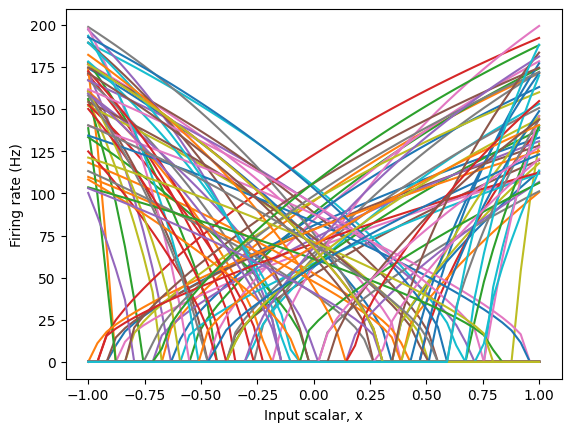

In [6]:
# Plot the tuning curves of the ensemble
plt.figure()
plt.plot(*tuning_curves(x, sim))
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x")

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0.5, 0, 'Input scalar, x')

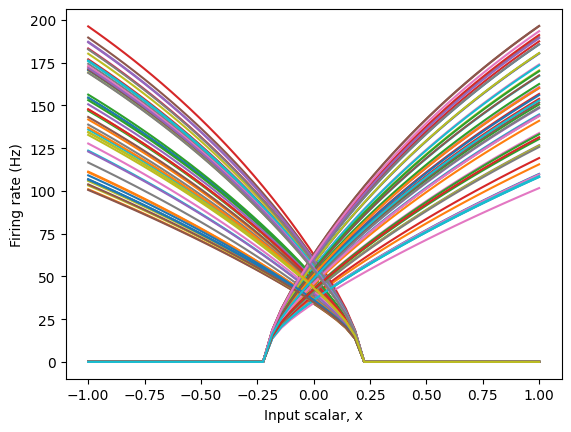

In [7]:
# Change the intercepts of all the neurons in `x` to -0.2
x.intercepts = Choice([-0.2])

with nengo.Simulator(model) as sim:
    plt.plot(*tuning_curves(x, sim))
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x")

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0.5, 0, 'Input scalar, x')

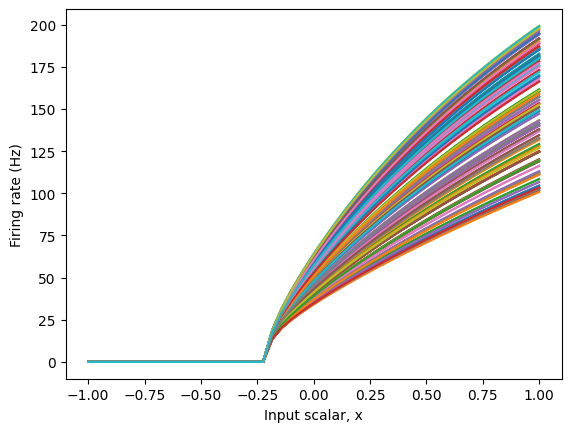

In [8]:
# Change the encoders of all neurons in `x` to [1]
x.encoders = Choice([[1]])

with nengo.Simulator(model) as sim:
    plt.plot(*tuning_curves(x, sim))
plt.plot(*tuning_curves(x, sim))
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x")